**Problem Statement**

We will be trying to understand sentiment of tweets about the company Apple. By using the twitter data we can hope to understand the public perception a bit better.

Our challenge is to see if we can correctly classify tweets as being either positive or negative.

Problem Statement:
•	Correctly classify the tweets as being positive or negative.

# Using: nltk.NaiveBayesClassifier

In [37]:
## Importing the necessary libraries along with the standard import

import numpy as np 
import pandas as pd 
import re # this is the regular expression library which helps us manipulate text (strings) fairly easily and intuitively
import nltk # this is the Natural Language Tool Kit which contains a lot of functionalities for text analytics
import matplotlib.pyplot as plt
import string # this is used for string manipulations
import matplotlib

In [38]:
## Let us check the version of the various libraries
print('Numpy version:',np.__version__)
print('Pandas version:',pd.__version__)
print('Regular Expression version:',re.__version__)
print('Natural Language Tool Kit version:',nltk.__version__)
print('Matplotlib version:',matplotlib.__version__)

Numpy version: 1.19.1
Pandas version: 1.0.5
Regular Expression version: 2.2.1
Natural Language Tool Kit version: 3.4.5
Matplotlib version: 3.3.0


Load the csv file available in the working or specified directory

In [39]:
Apple_tweets = pd.read_csv("Apple_tweets.csv")

In [40]:
## Checking the first 5 rows of the dataset
Apple_tweets.head()

,Tweet,Avg
0,"I have to say, Apple has by far the best custo...",2.0
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,2.0
2,LOVE U @APPLE,1.8
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",1.8
4,.@apple has the best customer service. In and ...,1.8


In [41]:
# All the special characters are removed here. we can see in 3rd row @ is removed. 4th row !!!! is removed.
## we converted the tweet variable to string by using.str function 

Apple_tweets['Tweet'] = Apple_tweets['Tweet'].str.replace('[^\w\s]','') 
Apple_tweets

,Tweet,Avg
0,I have to say Apple has by far the best custom...,2.0
1,iOS 7 is so fricking smooth beautiful ThanxAp...,2.0
2,LOVE U APPLE,1.8
3,Thank you apple loving my new iPhone 5S apple...,1.8
4,apple has the best customer service In and out...,1.8
...,...,...
1176,freak apple,-2.0
1177,WHY CANT I freakING SEE PICTURES ON MY TL IM A...,-2.0
1178,APPLE YOU freakING COWS freak YOU,-2.0
1179,apple I hate you why is my phone not working I...,-2.0


In [42]:
## convert all words to lower case
Apple_tweets['Tweet'] = Apple_tweets['Tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))

Apple_tweets

,Tweet,Avg
0,i have to say apple has by far the best custom...,2.0
1,ios 7 is so fricking smooth beautiful thanxapp...,2.0
2,love u apple,1.8
3,thank you apple loving my new iphone 5s apple ...,1.8
4,apple has the best customer service in and out...,1.8
...,...,...
1176,freak apple,-2.0
1177,why cant i freaking see pictures on my tl im a...,-2.0
1178,apple you freaking cows freak you,-2.0
1179,apple i hate you why is my phone not working i...,-2.0


In [43]:
## making the average colum as the dependent coulum. here the average column will be converted to dependent.
# here if the average is less than zero then those will be termed as negative and if the average is more than 1 then it 
# will be termed as positive.
def Tweet(x):
    if x >=0:
        return 'positive'
    else:return 'negative'

In [44]:
Apple_tweets['Sentiment'] = Apple_tweets['Avg'].apply(Tweet) 

In [45]:
Apple_tweets.drop('Avg',axis=1,inplace=True)

In [46]:
Apple_tweets.head()

,Tweet,Sentiment
0,i have to say apple has by far the best custom...,positive
1,ios 7 is so fricking smooth beautiful thanxapp...,positive
2,love u apple,positive
3,thank you apple loving my new iphone 5s apple ...,positive
4,apple has the best customer service in and out...,positive


We see that the newly created 'Sentiment' variable has all the positive entries one after the other and all the negative entries after. Since we need to split the data into training and test randomly we have to jumble up the data set.

###### Note: We are not using the train-test split function from sklearn and hence the need to jumble the data set.

In [47]:
## Shuffle the data set to introduce randomness in the order of the target variable
## now we can see the sentiment column positive and negative tweets are shuffled. earlier it was showing all the positives first 
# and then the negatives. 
Apple_tweets=Apple_tweets.sample(frac=1,random_state=3).reset_index().drop("index",axis=1)

In [48]:
Apple_tweets.head()

,Tweet,Sentiment
0,securitycompass apple,positive
1,quelquun peutil expliquer a apple ce quest le ...,negative
2,disappointing rt joconfino nothing short of a ...,negative
3,electrafood twitter apple me to ugh,positive
4,we have something that you wish you had called...,positive


In [49]:
## Split the entry of the text column into individual words for analysis
all_Words = [x for x in pd.Series(''.join(Apple_tweets['Tweet']).split())]


# 1st we are spliting each row of the dataframe into words.
# 2nd we are joining all the above words with a space between them.
# 3rd we are making a Series out of it.
# 4th we we are extracting each word one by one and storing it in the variable all_Words.

In [51]:
nltk.FreqDist(all_Words).most_common(10)

[('apple', 875),
 ('the', 466),
 ('to', 324),
 ('iphone', 236),
 ('a', 230),
 ('is', 200),
 ('i', 194),
 ('and', 182),
 ('you', 175),
 ('for', 144)]

In [52]:
# Defining a variable 'stopwords' which contains the list of punctuations from the string library and the english stopwords
# from nltk
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)

# Converting all the words to lower casse
all_words = (x.lower() for x in all_Words)
# Only keeping the words which are not the 'stopwords'
all_words_clean = [word for word in all_words if word not in stopwords]


# Creating a frequency distribution of the lower case words which does not contain any stopwords
all_words_freq = nltk.FreqDist(all_words_clean)

# Extracting the  most common 2000 words after the list of words have been converted to lowercase and the stopwords 
word_features = [item[0] for item in all_words_freq.most_common(2000)]

In [54]:
word_features

['apple',
 'iphone',
 'new',
 'ipad',
 '5s',
 'itunes',
 'ipod',
 'phone',
 'get',
 '5c',
 'dont',
 'like',
 'promoipodplayerpromo',
 'de',
 'im',
 'app',
 'appleapple',
 'make',
 'ios',
 'store',
 'one',
 'apples',
 'ipodplayerpromo',
 '5',
 'iphone5s',
 'iphone5c',
 'need',
 'time',
 'really',
 'iphones',
 'would',
 'rt',
 'think',
 'u',
 'fingerprint',
 'freak',
 '7',
 'google',
 'want',
 'us',
 'microsoft',
 'cant',
 'ios7',
 'promo',
 'better',
 'android',
 'thanks',
 'via',
 'twitter',
 'use',
 'back',
 'well',
 'hate',
 'battery',
 'come',
 'thats',
 'samsung',
 'buy',
 'still',
 'wont',
 'please',
 'go',
 'devices',
 'know',
 'making',
 'love',
 '2',
 'people',
 'going',
 'let',
 'next',
 'release',
 'sure',
 'yall',
 'every',
 'using',
 'good',
 'service',
 'mobile',
 'apps',
 'look',
 'facebook',
 'much',
 'nokia',
 'free',
 'work',
 'got',
 'doesnt',
 'news',
 'youre',
 'en',
 'give',
 'freaking',
 'year',
 'way',
 'black',
 'today',
 'instead',
 'preorder',
 'best',
 'steve

In [55]:
## We are defining a function to appropriately process the text document

def document_features(document): # we are naming the function as document_features
    document_words = set(document) #getting the unique number of entries in the document variable
    features = {} #defining an empty dictionary
    for word in word_features: #looping over the 'word_features' which has been defined in the last code block
        features['contains({})'.format(word)] = (word in document_words) #defining 'features' in  particular format
        # and checking whether the unique elements of the input 'document' are contained in the 'word_features' 
        # defined before
    return features

In [56]:
## Create a data frame with the values of the text column in the original data set as tokens
## from the Apple_tweets original dataframe a new df is created called frame.
# two rows feature and label are added to theis new df frame and the words in this df are seperated by a comma
# below we can see the frame df and see the difference between this df and apple_tweet df. 
frame = Apple_tweets.copy()
frame.columns = ['feature','label']
frame['feature'] = frame.apply(lambda row:nltk.word_tokenize(str(row['feature'])),axis=1) 
frame['label'] = frame.label



In [59]:
Apple_tweets

,Tweet,Sentiment
0,securitycompass apple,positive
1,quelquun peutil expliquer a apple ce quest le ...,negative
2,disappointing rt joconfino nothing short of a ...,negative
3,electrafood twitter apple me to ugh,positive
4,we have something that you wish you had called...,positive
...,...,...
1176,i dont like ios7 theyre changing the look of e...,negative
1177,apple discontinues cards app and printing serv...,negative
1178,the only thing im asking from apple is a water...,positive
1179,ugh literally once a day my phone just spazzes...,negative


In [58]:
# compared to apple tweet df the words are seperated by a comma
frame

,feature,label
0,"[securitycompass, apple]",positive
1,"[quelquun, peutil, expliquer, a, apple, ce, qu...",negative
2,"[disappointing, rt, joconfino, nothing, short,...",negative
3,"[electrafood, twitter, apple, me, to, ugh]",positive
4,"[we, have, something, that, you, wish, you, ha...",positive
...,...,...
1176,"[i, dont, like, ios7, theyre, changing, the, l...",negative
1177,"[apple, discontinues, cards, app, and, printin...",negative
1178,"[the, only, thing, im, asking, from, apple, is...",positive
1179,"[ugh, literally, once, a, day, my, phone, just...",negative


In [60]:
frame['feature'][0]

['securitycompass', 'apple']

In [61]:
# here we are creating this code to check if the particular word in each row of the frame df and check if the word is there or not 
featuresets = [(document_features(feature), label) for index, (feature, label) in frame.iterrows()]

In [62]:
## we can see here the first row of the frame had security compass and apple. below we will see that apple and security will be true 
# because these two words are there and rest will be false. 
featuresets[0]

({'contains(apple)': True,
  'contains(iphone)': False,
  'contains(new)': False,
  'contains(ipad)': False,
  'contains(5s)': False,
  'contains(itunes)': False,
  'contains(ipod)': False,
  'contains(phone)': False,
  'contains(get)': False,
  'contains(5c)': False,
  'contains(dont)': False,
  'contains(like)': False,
  'contains(promoipodplayerpromo)': False,
  'contains(de)': False,
  'contains(im)': False,
  'contains(app)': False,
  'contains(appleapple)': False,
  'contains(make)': False,
  'contains(ios)': False,
  'contains(store)': False,
  'contains(one)': False,
  'contains(apples)': False,
  'contains(ipodplayerpromo)': False,
  'contains(5)': False,
  'contains(iphone5s)': False,
  'contains(iphone5c)': False,
  'contains(need)': False,
  'contains(time)': False,
  'contains(really)': False,
  'contains(iphones)': False,
  'contains(would)': False,
  'contains(rt)': False,
  'contains(think)': False,
  'contains(u)': False,
  'contains(fingerprint)': False,
  'contains(f

In [67]:
# Train the Naive Bayes classifier
# 0: 70% of the data is trainset and the rest as test
train_set,test_set = featuresets[0:int(len(featuresets)*0.7)],featuresets[int(len(featuresets)*0.7):] 
classifier = nltk.NaiveBayesClassifier.train(train_set)


In [68]:
## Check the accuracy of the classifier on the test set
print(nltk.classify.accuracy(classifier, test_set))

0.6563380281690141


# Alternate Way: using Naive Bayes Classifier.
Now, let us reload the data and look at a few other text mining functionalities that Python offers us and then go on to fit a classifier algorithm.

In [150]:
#import os
#os.chdir('C:\\GL Class\DSBA - Python\Machine Learning\Week 3')
Apple_tweets = pd.read_csv("Apple_tweets.csv")

## Basic Exploration in Text Mining

### Number of words

**To create a temporary function lambda can be used. These functions do not require a name like a def function, however the output is same as defining a permanent function**
**As these function are temporary, memory comsumption is less in comparison to permanent function. Also there are multiple ways to get a similar output**


In [151]:
## Let's get a word count without writing a lambda function
Apple_tweets['totalwords'] = [len(x.split()) for x in Apple_tweets['Tweet'].tolist()] 
Apple_tweets[['Tweet','totalwords']].head() 


,Tweet,totalwords
0,"I have to say, Apple has by far the best custo...",19
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,10
2,LOVE U @APPLE,3
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",11
4,.@apple has the best customer service. In and ...,16


In [152]:
## Let's get a word count writing a lambda function
Apple_tweets['word_count'] = Apple_tweets['Tweet'].apply(lambda x: len(str(x).split()))
Apple_tweets[['Tweet','word_count']].head()

,Tweet,word_count
0,"I have to say, Apple has by far the best custo...",19
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,10
2,LOVE U @APPLE,3
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",11
4,.@apple has the best customer service. In and ...,16


### Number of Characters- including spaces

In [153]:
Apple_tweets['char_count']=Apple_tweets['Tweet'].str.len()
Apple_tweets[['Tweet','char_count']].head()

,Tweet,char_count
0,"I have to say, Apple has by far the best custo...",101
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,60
2,LOVE U @APPLE,13
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",91
4,.@apple has the best customer service. In and ...,82


In [154]:
Apple_tweets['Tweet'][0]

'I have to say, Apple has by far the best customer care service I have ever received! @Apple @AppStore'

In [155]:
len(Apple_tweets['Tweet'][0]) 

101

### Average Word Length

In [156]:
def avg_word(sentence):
    words = sentence.split() #splitting the words separately from the input taken
    return (sum(len(word) for word in words)/len(words)) # getting the average number of words in the each of the entries

Apple_tweets['avg_word'] = Apple_tweets['Tweet'].apply(lambda x: avg_word(x))
Apple_tweets[['Tweet','avg_word']].head()

,Tweet,avg_word
0,"I have to say, Apple has by far the best custo...",4.368421
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,5.100000
2,LOVE U @APPLE,3.666667
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",7.272727
4,.@apple has the best customer service. In and ...,4.187500


### Number of stop Words

In [157]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [158]:
# we can see how many stop words are there in each row of tweets. in row 1 there are 6 stop words. 
Apple_tweets['stopwords'] = Apple_tweets['Tweet'].apply(lambda x: len([x for x in x.split() if x in stop]))
Apple_tweets[['Tweet','stopwords']].head()

,Tweet,stopwords
0,"I have to say, Apple has by far the best custo...",6
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,2
2,LOVE U @APPLE,0
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",2
4,.@apple has the best customer service. In and ...,8


In [159]:
## stop.append('Apple')    

In [160]:
## we can see that above apple was appended as stop word and now on the first document stopwords are 7 instead of 6. 
#Apple_tweets['stopwords'] = Apple_tweets['Tweet'].apply(lambda x: len([x for x in x.split() if x in stop]))
#Apple_tweets[['Tweet','stopwords']].head()

### Number of hastags character

In [161]:
Apple_tweets['hastags'] = Apple_tweets['Tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
Apple_tweets[['Tweet','hastags']].head()

,Tweet,hastags
0,"I have to say, Apple has by far the best custo...",0
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,1
2,LOVE U @APPLE,0
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",2
4,.@apple has the best customer service. In and ...,0


### Number of numerics

In [162]:
#Checking number of numerics in each tweet
Apple_tweets['numerics'] = Apple_tweets['Tweet'].apply(lambda x: len(re.findall(r'[0-9]',x)))
Apple_tweets[['Tweet','numerics']].head()

,Tweet,numerics
0,"I have to say, Apple has by far the best custo...",0
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,1
2,LOVE U @APPLE,0
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",3
4,.@apple has the best customer service. In and ...,2


### Number of Uppercase Words

In [163]:
Apple_tweets['upper'] = Apple_tweets['Tweet'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
Apple_tweets[['Tweet','upper']].head()

,Tweet,upper
0,"I have to say, Apple has by far the best custo...",2
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,0
2,LOVE U @APPLE,3
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",1
4,.@apple has the best customer service. In and ...,0


### Number of Uppercase Letters

In [164]:
Apple_tweets['upper_letter'] = Apple_tweets['Tweet'].apply(lambda x: len(re.findall(r'[A-Z]',x))) 
Apple_tweets[['Tweet','upper_letter']].head()

,Tweet,upper_letter
0,"I have to say, Apple has by far the best custo...",6
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,5
2,LOVE U @APPLE,10
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",9
4,.@apple has the best customer service. In and ...,1


## Basic Pre-Processing

### Lower Case conversion

In [165]:
Apple_tweets['Tweet'] = Apple_tweets['Tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
Apple_tweets['Tweet'].head()

0    i have to say, apple has by far the best custo...
1    ios 7 is so fricking smooth & beautiful!! #tha...
2                                        love u @apple
3    thank you @apple, loving my new iphone 5s!!!!!...
4    .@apple has the best customer service. in and ...
Name: Tweet, dtype: object

### Removal of Punctuation

In [171]:
Apple_tweets['Tweet'] = Apple_tweets['Tweet'].str.replace('[^\w\s]','')
Apple_tweets['Tweet'].head()

0    say apple far best customer care service ever ...
1    ios 7 fricking smooth  beautiful thanxapple apple
2                                         love u apple
3    thank apple loving new iphone 5s apple iphone5...
4          apple best customer service new phone 10min
Name: Tweet, dtype: object

### Removal of StopWords

In [172]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
Apple_tweets['Tweet'] = Apple_tweets['Tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
Apple_tweets['Tweet'].head()

0    say apple far best customer care service ever ...
1     ios 7 fricking smooth beautiful thanxapple apple
2                                         love u apple
3    thank apple loving new iphone 5s apple iphone5...
4          apple best customer service new phone 10min
Name: Tweet, dtype: object

### Common Words Removal
1. **We will create a list of 10 frequently occuring words and then decide if we need to remove it or retain it.**
2. **Reason is that this file has tweets related to Apple.. So no point in keeping the word like Apple, unless we have tweets from other brands**

In [173]:
freq = pd.Series(' '.join(Apple_tweets['Tweet']).split()).value_counts()[:10]
freq

apple              1297
iphone              257
new                 113
5s                   91
ipad                 88
itunes               79
phone                75
ipod                 71
ipodplayerpromo      60
get                  60
dtype: int64

In [174]:
freq =['apple','get']

1. **As we are talking about multiple products hence iphone will be kept, similarly some tweets do relate to old products without mentioning the word old, hence even new would be kept in the tweets.**
2. **hence only apple and get would be removed**

In [178]:
# this code will joing all the words in apple tweet but are not there in freq. in freq apple and get are there
#so when apple tweet runs in loop and in watever word is there in freq that word is removed from apple_tweet also and other words are joined.
Apple_tweets['Tweet'] = Apple_tweets['Tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
Apple_tweets['Tweet'].head()

0    say far best customer care service ever receiv...
1           ios 7 fricking smooth beautiful thanxapple
2                                               love u
3    thank loving new iphone 5s iphone5s pictwitter...
4                best customer service new phone 10min
Name: Tweet, dtype: object

### Rare Words Removal
**This is done as association of these less occurring words with the existing words could be a noise**

In [180]:
freq = pd.Series(' '.join(Apple_tweets['Tweet']).split()).value_counts()[-10:]
freq
## As it is difficult to make out if these words will have association in text analytics or not, 
## hence to start with these words are kept in the dataset
# these words are appearing very less and can be removed because they provide no meaning

frente          1
dredd           1
wensen          1
toi             1
po_st           1
ybarra214amy    1
qnx             1
correctly       1
john            1
considered      1
dtype: int64

### Stemming -refers to the removal of suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach

In [181]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
Apple_tweets['Tweet'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    say far best custom care servic ever receiv ap...
1                   io 7 frick smooth beauti thanxappl
2                                               love u
3    thank love new iphon 5s iphone5 pictwittercomx...
4                   best custom servic new phone 10min
Name: Tweet, dtype: object

In [182]:
def Tweet(x):
    if x >= 0:
        return "Positive"
    else: return "Negative"


### Now to get the sentiments as positive and negative , convert the Avg column . If value is >= 0  then tweet is Positive, else tweet is Negative. This will make a dependent variable as a binary classifier

In [183]:
Apple_tweets["Sentiment"] = Apple_tweets["Avg"].apply(Tweet)
Apple_tweets.head()

,Tweet,Avg,totalwords,word_count,char_count,avg_word,stopwords,hastags,numerics,upper,upper_letter,Sentiment
0,say far best customer care service ever receiv...,2.0,19,19,101,4.368421,6,0,0,2,6,Positive
1,ios 7 fricking smooth beautiful thanxapple,2.0,10,10,60,5.100000,2,1,1,0,5,Positive
2,love u,1.8,3,3,13,3.666667,0,0,0,3,10,Positive
3,thank loving new iphone 5s iphone5s pictwitter...,1.8,11,11,91,7.272727,2,2,3,1,9,Positive
4,best customer service new phone 10min,1.8,16,16,82,4.187500,8,0,2,0,1,Positive


In [185]:
Apple_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1181 entries, 0 to 1180
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tweet         1181 non-null   object 
 1   Avg           1181 non-null   float64
 2   totalwords    1181 non-null   int64  
 3   word_count    1181 non-null   int64  
 4   char_count    1181 non-null   int64  
 5   avg_word      1181 non-null   float64
 6   stopwords     1181 non-null   int64  
 7   hastags       1181 non-null   int64  
 8   numerics      1181 non-null   int64  
 9   upper         1181 non-null   int64  
 10  upper_letter  1181 non-null   int64  
 11  Sentiment     1181 non-null   object 
dtypes: float64(2), int64(8), object(2)
memory usage: 110.8+ KB


## Let's look at distribution of different sentiments

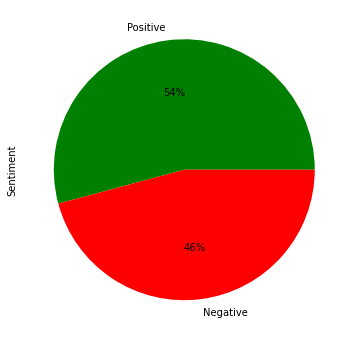

In [186]:
plt.figure(figsize=(8,6))
Apple_tweets.Sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["green","red"])
plt.show()

In [191]:
## here we are spliting the tweets variable into processed_features and the sentiment into labels. 
processed_features = Apple_tweets.iloc[:, 0].values
labels = Apple_tweets.iloc[:, 11].values

In [192]:
processed_features

array(['say far best customer care service ever received appstore',
       'ios 7 fricking smooth beautiful thanxapple', 'love u', ...,
       'freaking cows freak', 'hate phone working im going freak',
       'agounalakis thats nasty nasty brat'], dtype=object)

In [193]:
labels

array(['Positive', 'Positive', 'Positive', ..., 'Negative', 'Negative',
       'Negative'], dtype=object)

## TfidfVectorizer

In [194]:
# min_df: this is have feature that appear in minimum 7 tweets if the feature is appearing less than 7 drop those words(feature)
# max_df: if the feature is appearing in more than 80% of the document remove that
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8)
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [195]:
vectorizer

TfidfVectorizer(max_df=0.8, max_features=2500, min_df=7)

In [200]:
## Create TF-IDF, sort it by feature '5s', check the first 5 observations
## Extra Knowledge Bytes (TF-IDF)

# Let's see how our TD-IDF looks like (sorting by the feature named 5s)
# Creating the TF-IDF with the feature names given by the TFIDF vectorizer, sorting it for unerstanding.
# Let's chain the .head() method on the DataFrame to inspect the first few observations of the TD-IDF sorted by '5s'
pd.DataFrame(processed_features, columns = vectorizer.get_feature_names()).sort_values(by = '5s', ascending=False).head() 

,5c,5s,7evenstarz,actually,already,always,amazing,amazon,android,anyone,...,would,wow,wtf,ya,yall,year,yes,yet,yo,yooo
742,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
993,0.0,0.807513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
507,0.0,0.807513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
509,0.0,0.807513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.0,0.807513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Train-Test split

In [201]:
#Split the data into 70%-30% as train-test)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.3, random_state=0)

In [202]:
y_train

array(['Negative', 'Negative', 'Positive', 'Negative', 'Positive',
       'Positive', 'Positive', 'Negative', 'Positive', 'Negative',
       'Negative', 'Positive', 'Negative', 'Negative', 'Negative',
       'Positive', 'Positive', 'Negative', 'Positive', 'Positive',
       'Negative', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Negative', 'Negative', 'Negative',
       'Positive', 'Negative', 'Negative', 'Positive', 'Positive',
       'Positive', 'Negative', 'Positive', 'Negative', 'Negative',
       'Positive', 'Positive', 'Positive', 'Negative', 'Positive',
       'Positive', 'Negative', 'Positive', 'Positive', 'Negative',
       'Negative', 'Negative', 'Negative', 'Positive', 'Positive',
       'Positive', 'Negative', 'Positive', 'Negative', 'Positive',
       'Negative', 'Negative', 'Positive', 'Positive', 'Positive',
       'Negative', 'Positive', 'Positive', 'Negative', 'Positive',
       'Negative', 'Positive', 'Negative', 'Negative', 'Positi

# Gaussian Naive Bayes

In [203]:
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [204]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [205]:
## Performance Matrix on train data set
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)                      ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))          ## confusion_matrix
print(metrics.classification_report(y_train, y_train_predict))     ## classification_report

0.761501210653753
[[185 181]
 [ 16 444]]
              precision    recall  f1-score   support

    Negative       0.92      0.51      0.65       366
    Positive       0.71      0.97      0.82       460

    accuracy                           0.76       826
   macro avg       0.82      0.74      0.74       826
weighted avg       0.80      0.76      0.74       826



In [206]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)                    
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))         
print(metrics.classification_report(y_test, y_test_predict)) 

0.6591549295774648
[[ 87  88]
 [ 33 147]]
              precision    recall  f1-score   support

    Negative       0.72      0.50      0.59       175
    Positive       0.63      0.82      0.71       180

    accuracy                           0.66       355
   macro avg       0.68      0.66      0.65       355
weighted avg       0.67      0.66      0.65       355



## Conclusion

**Pl. note - Model building is an iterative process. Model performance both on the test and train dataset can be improved using feature engineering, feature extraction, hyper parameter tuning (including combination of various parameters).** 

**Model has to match the business objective and hence various permutation and combinations can be tried on to refine the model**

## Creating a Wordcloud

In [218]:
# Recall Apple_Tweets['Tweet'] from above. It has been processed at a basic level!
Apple_tweets['Tweet'].iloc[30:31] #Checking a tweet at random!

30    dear love new default alarm ringtone goodmorning
Name: Tweet, dtype: object

In [219]:
# Removing symbols and punctuations 
# further_clean = Apple_tweets['Tweet'].str.replace('[^\w\s]','')

# Extending the list of stop words (including words like Apple, bitly, dear, please, etc.)

# instead of append extend can be used to add many words at one time append will add only one word at a time. 
stop_words = list(stopwords.words('english'))
stop_words.extend(["apple", "http","bit","bitly","bit ly", "dear", "im", "i'm", "please"])

In [220]:
#Removing stop words (extended list as above) from the corpus 

corpus = Apple_tweets['Tweet'].apply(lambda x: ' '.join([z for z in x.split() if z not in stop_words])) 
corpus

0       say far best customer care service ever receiv...
1              ios 7 fricking smooth beautiful thanxapple
2                                                  love u
3       thank loving new iphone 5s iphone5s pictwitter...
4                   best customer service new phone 10min
                              ...                        
1176                                                freak
1177    cant freaking see pictures tl annoyed freak tw...
1178                                  freaking cows freak
1179                       hate phone working going freak
1180                   agounalakis thats nasty nasty brat
Name: Tweet, Length: 1181, dtype: object

In [221]:
wc_a = ' '.join(corpus)

Word Cloud for Apple_Tweets (after cleaning)!!


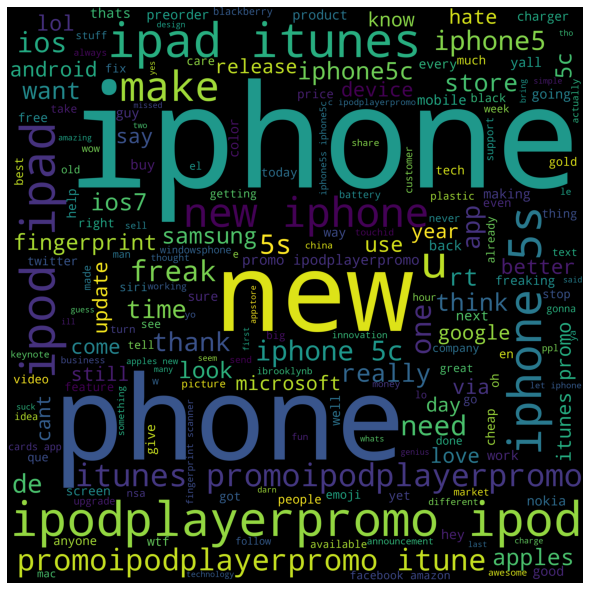

In [226]:
# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_a) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Apple_Tweets (after cleaning)!!")
plt.show()

#Tip: You can specify stopwords, regex (punctuations/symbols) in the wordcloud itself, check CTRL+TAB on the wordcloud fuction!